In [1]:
print("Churn Prediction System Using Hybrid Classifier In Machine Learning")


Churn Prediction System Using Hybrid Classifier In Machine Learning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TelecomData = pd.read_csv("bigml.csv")
TelecomData


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103.0,NaN,254.4,103.0,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,NaN,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71.0,50.90,...,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98.0,37.98,...,101.0,18.75,203.9,118.0,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,NaN,37.09,...,108.0,29.62,212.6,118.0,9.57,7.5,7,NaN,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79.0,26.69,...,94.0,8.76,211.8,96.0,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97.0,31.37,...,80.0,29.89,215.8,90.0,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84.0,43.96,...,111.0,18.87,326.4,97.0,14.69,11.2,5,3.02,0,False


In [2]:
TelecomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23331 entries, 0 to 23330
Data columns (total 21 columns):
state                     23331 non-null object
account length            23331 non-null int64
area code                 23331 non-null int64
phone number              23331 non-null object
international plan        23331 non-null object
voice mail plan           23331 non-null object
number vmail messages     23331 non-null int64
total day minutes         23329 non-null float64
total day calls           23327 non-null float64
total day charge          23331 non-null float64
total eve minutes         23326 non-null float64
total eve calls           23328 non-null float64
total eve charge          23328 non-null float64
total night minutes       23328 non-null float64
total night calls         23330 non-null float64
total night charge        23327 non-null float64
total intl minutes        23331 non-null float64
total intl calls          23331 non-null int64
total intl charge    

In [3]:
df = pd.DataFrame(TelecomData,columns=['area code','voice mail plan','total day minutes'])
df.head()

,area code,voice mail plan,total day minutes
0,415,yes,265.1
1,415,yes,161.6
2,415,no,243.4
3,408,no,299.4
4,415,no,166.7


In [22]:
#df.loc[df['total day minutes'].isin('256','281')]

In [23]:
#for i in range(0,50):
 #   if df['total day minutes'] == i:
  #        data = df[ df['area code'] != i]

In [4]:
df.drop([1,2]).head()

,area code,voice mail plan,total day minutes
0,415,yes,265.1
3,408,no,299.4
4,415,no,166.7
5,510,no,223.4
6,510,yes,218.2
7,415,no,157.0
8,408,no,184.5
9,415,yes,258.6
10,415,no,129.1
11,415,no,187.7


In [31]:

data = df[ df['area code'] < 415 ]
data.head()
df['area code']
    

0        415
1        415
2        415
3        408
4        415
5        510
6        510
7        415
8        408
9        415
10       415
11       415
12       408
13       510
14       415
15       415
16       408
17       510
18       510
19       415
20       415
21       408
22       415
23       415
24       510
25       415
26       408
27       408
28       415
29       510
        ... 
23301    415
23302    510
23303    415
23304    408
23305    408
23306    415
23307    408
23308    415
23309    415
23310    408
23311    408
23312    415
23313    415
23314    510
23315    415
23316    415
23317    415
23318    510
23319    415
23320    408
23321    415
23322    415
23323    408
23324    415
23325    415
23326    415
23327    415
23328    510
23329    510
23330    415
Name: area code, Length: 23331, dtype: int64

In [40]:
for index,row in df.iterrows():
    if(row['area code'] ==415):
         data =df[df['area code'] != 415]
        print(index,row['area code'],row['voice mail plan'])
    #print(index,row['area code'])
print(df.head())  

0 415 yes
1 415 yes
2 415 no
4 415 no
7 415 no
9 415 yes
10 415 no
11 415 no
14 415 no
15 415 no
19 415 no
20 415 no
22 415 no
23 415 no
25 415 no
28 415 no
30 415 no
35 415 yes
37 415 no
38 415 yes
43 415 no
46 415 no
48 415 no
49 415 yes
53 415 no
54 415 no
56 415 no
58 415 no
61 415 yes
65 415 yes
66 415 no
73 415 no
74 415 no
75 415 no
76 415 no
78 415 no
80 415 no
81 415 no
83 415 yes
88 415 yes
89 415 no
91 415 no
92 415 no
93 415 no
94 415 no
96 415 no
97 415 no
99 415 no
101 415 no
102 415 no
108 415 yes
111 415 no
114 415 no
117 415 no
123 415 no
126 415 no
130 415 no
132 415 no
136 415 yes
139 415 yes
141 415 yes
142 415 yes
145 415 no
151 415 no
153 415 no
154 415 no
156 415 no
160 415 no
161 415 no
163 415 no
164 415 no
165 415 yes
167 415 no
172 415 no
173 415 no
175 415 no
176 415 no
177 415 no
181 415 no
185 415 no
187 415 no
190 415 no
191 415 no
193 415 no
195 415 yes
196 415 no
200 415 yes
202 415 no
204 415 no
205 415 yes
206 415 no
207 415 no
210 415 no
212 415 yes


1569 415 yes
1570 415 no
1573 415 yes
1574 415 yes
1578 415 no
1579 415 yes
1580 415 yes
1581 415 yes
1583 415 yes
1585 415 no
1586 415 no
1587 415 no
1588 415 no
1589 415 no
1590 415 yes
1591 415 yes
1593 415 no
1594 415 yes
1595 415 no
1598 415 yes
1600 415 yes
1602 415 yes
1605 415 no
1606 415 no
1607 415 yes
1609 415 no
1611 415 yes
1612 415 no
1613 415 no
1614 415 no
1616 415 no
1617 415 no
1618 415 yes
1619 415 no
1622 415 no
1624 415 no
1632 415 no
1633 415 no
1634 415 no
1637 415 no
1640 415 no
1641 415 no
1645 415 yes
1651 415 no
1652 415 yes
1656 415 yes
1660 415 no
1662 415 no
1664 415 yes
1665 415 yes
1666 415 no
1667 415 no
1670 415 yes
1671 415 no
1673 415 no
1675 415 no
1677 415 no
1683 415 yes
1685 415 no
1687 415 no
1688 415 no
1690 415 yes
1691 415 no
1692 415 no
1693 415 yes
1694 415 no
1695 415 no
1701 415 no
1702 415 no
1703 415 yes
1706 415 no
1708 415 yes
1710 415 no
1711 415 yes
1714 415 no
1718 415 no
1719 415 no
1721 415 no
1727 415 no
1728 415 yes
1729 415 ye

3239 415 yes
3241 415 no
3242 415 yes
3243 415 no
3244 415 no
3245 415 no
3248 415 no
3249 415 no
3250 415 no
3253 415 yes
3254 415 yes
3257 415 no
3260 415 no
3261 415 no
3264 415 yes
3265 415 no
3267 415 no
3268 415 no
3270 415 no
3271 415 no
3277 415 no
3278 415 no
3279 415 yes
3282 415 yes
3284 415 yes
3285 415 no
3286 415 yes
3287 415 yes
3288 415 no
3295 415 no
3300 415 yes
3301 415 no
3303 415 yes
3305 415 yes
3308 415 no
3310 415 no
3311 415 no
3314 415 no
3315 415 yes
3317 415 no
3318 415 no
3319 415 no
3321 415 no
3323 415 no
3324 415 no
3326 415 no
3327 415 no
3328 415 yes
3329 415 no
3332 415 yes
3333 415 yes
3334 415 yes
3335 415 no
3337 415 no
3340 415 no
3342 415 yes
3343 415 no
3344 415 no
3347 415 no
3348 415 no
3352 415 no
3353 415 no
3355 415 no
3356 415 no
3358 415 no
3361 415 no
3363 415 no
3368 415 yes
3370 415 no
3371 415 yes
3376 415 no
3379 415 no
3381 415 no
3382 415 yes
3386 415 no
3387 415 no
3389 415 no
3391 415 no
3394 415 yes
3398 415 yes
3399 415 no
3406

4820 415 yes
4822 415 no
4823 415 no
4826 415 yes
4827 415 no
4829 415 yes
4832 415 no
4836 415 yes
4839 415 no
4844 415 no
4846 415 no
4847 415 no
4849 415 no
4850 415 no
4851 415 no
4853 415 yes
4854 415 no
4856 415 no
4858 415 no
4859 415 yes
4861 415 no
4865 415 yes
4868 415 no
4869 415 no
4871 415 no
4874 415 yes
4879 415 no
4880 415 no
4881 415 no
4884 415 no
4886 415 no
4887 415 no
4890 415 yes
4891 415 yes
4892 415 no
4895 415 no
4896 415 yes
4898 415 no
4899 415 yes
4900 415 no
4901 415 yes
4902 415 yes
4903 415 no
4906 415 yes
4907 415 yes
4911 415 no
4912 415 yes
4913 415 yes
4914 415 yes
4916 415 yes
4918 415 no
4919 415 no
4920 415 no
4921 415 no
4922 415 no
4923 415 yes
4924 415 yes
4926 415 no
4927 415 yes
4928 415 no
4931 415 yes
4933 415 yes
4935 415 yes
4938 415 no
4939 415 no
4940 415 yes
4942 415 no
4944 415 yes
4945 415 no
4946 415 no
4947 415 no
4949 415 no
4950 415 no
4951 415 yes
4952 415 no
4955 415 no
4957 415 no
4965 415 no
4966 415 no
4967 415 no
4970 415 no

6587 415 yes
6590 415 no
6593 415 no
6594 415 no
6597 415 yes
6598 415 no
6600 415 no
6601 415 no
6603 415 no
6604 415 no
6610 415 no
6611 415 no
6612 415 yes
6615 415 yes
6617 415 yes
6618 415 no
6619 415 yes
6620 415 yes
6621 415 no
6628 415 no
6633 415 yes
6634 415 no
6636 415 yes
6638 415 yes
6641 415 no
6643 415 no
6644 415 no
6647 415 no
6648 415 yes
6650 415 no
6651 415 no
6652 415 no
6654 415 no
6656 415 no
6657 415 no
6659 415 no
6660 415 no
6661 415 yes
6662 415 no
6665 415 yes
6666 415 yes
6667 415 yes
6668 415 no
6670 415 no
6673 415 no
6675 415 yes
6676 415 no
6677 415 no
6680 415 no
6681 415 no
6685 415 no
6686 415 no
6688 415 no
6689 415 no
6691 415 no
6694 415 no
6696 415 no
6701 415 yes
6703 415 no
6704 415 yes
6709 415 no
6712 415 no
6714 415 no
6715 415 yes
6719 415 no
6720 415 no
6722 415 no
6724 415 no
6727 415 yes
6731 415 yes
6732 415 no
6739 415 no
6740 415 no
6741 415 no
6742 415 no
6744 415 no
6746 415 no
6747 415 no
6749 415 yes
6754 415 yes
6755 415 no
6757 

7962 415 no
7963 415 yes
7965 415 no
7967 415 no
7969 415 no
7971 415 no
7972 415 no
7974 415 no
7975 415 no
7977 415 no
7978 415 no
7979 415 no
7981 415 no
7983 415 yes
7985 415 no
7986 415 yes
7988 415 no
7990 415 no
7993 415 no
7995 415 no
7998 415 yes
8001 415 no
8002 415 no
8004 415 no
8005 415 no
8007 415 yes
8008 415 yes
8010 415 no
8011 415 no
8017 415 no
8018 415 yes
8022 415 no
8025 415 no
8026 415 no
8027 415 no
8029 415 yes
8030 415 no
8032 415 no
8033 415 no
8035 415 no
8037 415 no
8039 415 no
8041 415 yes
8042 415 no
8043 415 yes
8044 415 yes
8045 415 no
8046 415 no
8048 415 yes
8049 415 yes
8052 415 yes
8053 415 no
8054 415 no
8058 415 no
8059 415 no
8061 415 no
8062 415 yes
8066 415 no
8068 415 no
8072 415 no
8073 415 yes
8075 415 yes
8078 415 yes
8080 415 no
8084 415 yes
8085 415 no
8086 415 no
8087 415 yes
8089 415 yes
8092 415 yes
8093 415 no
8094 415 no
8096 415 yes
8098 415 no
8101 415 yes
8103 415 yes
8105 415 no
8109 415 no
8110 415 no
8112 415 yes
8113 415 no
81

9738 415 no
9742 415 no
9746 415 no
9747 415 no
9750 415 no
9751 415 no
9754 415 yes
9758 415 no
9760 415 no
9761 415 yes
9762 415 yes
9763 415 no
9764 415 no
9766 415 no
9767 415 yes
9768 415 yes
9769 415 no
9771 415 no
9775 415 no
9778 415 no
9779 415 no
9783 415 no
9786 415 yes
9788 415 no
9792 415 no
9793 415 no
9794 415 no
9798 415 no
9799 415 no
9800 415 no
9805 415 no
9807 415 yes
9809 415 no
9811 415 no
9813 415 no
9814 415 no
9816 415 yes
9818 415 no
9819 415 no
9820 415 yes
9823 415 no
9824 415 no
9825 415 no
9828 415 no
9830 415 no
9832 415 no
9834 415 no
9835 415 no
9836 415 no
9839 415 no
9842 415 no
9844 415 no
9848 415 no
9850 415 no
9851 415 no
9852 415 no
9854 415 no
9856 415 no
9857 415 no
9859 415 no
9860 415 yes
9863 415 no
9864 415 yes
9874 415 no
9875 415 yes
9877 415 no
9879 415 no
9884 415 yes
9885 415 yes
9888 415 yes
9890 415 no
9893 415 no
9895 415 no
9899 415 no
9903 415 no
9905 415 yes
9907 415 no
9908 415 yes
9909 415 no
9910 415 no
9911 415 no
9914 415 no

11525 415 yes
11527 415 no
11531 415 yes
11534 415 no
11535 415 no
11537 415 no
11540 415 yes
11545 415 no
11546 415 no
11547 415 no
11550 415 no
11552 415 no
11553 415 no
11556 415 yes
11557 415 yes
11558 415 no
11561 415 no
11562 415 yes
11564 415 no
11565 415 yes
11566 415 no
11567 415 yes
11568 415 yes
11569 415 no
11572 415 yes
11573 415 yes
11577 415 no
11578 415 yes
11579 415 yes
11580 415 yes
11582 415 yes
11584 415 no
11585 415 no
11586 415 no
11587 415 no
11588 415 no
11589 415 yes
11590 415 yes
11592 415 no
11593 415 yes
11594 415 no
11597 415 yes
11599 415 yes
11601 415 yes
11604 415 no
11605 415 no
11606 415 yes
11608 415 no
11610 415 yes
11611 415 no
11612 415 no
11613 415 no
11615 415 no
11616 415 no
11617 415 yes
11618 415 no
11621 415 no
11623 415 no
11631 415 no
11632 415 no
11633 415 no
11636 415 no
11639 415 no
11640 415 no
11644 415 yes
11650 415 no
11651 415 yes
11655 415 yes
11659 415 no
11661 415 no
11663 415 yes
11664 415 yes
11665 415 no
11666 415 no
11669 415

13249 415 no
13252 415 yes
13253 415 yes
13256 415 no
13259 415 no
13260 415 no
13263 415 yes
13264 415 no
13266 415 no
13267 415 no
13269 415 no
13270 415 no
13276 415 no
13277 415 no
13278 415 yes
13281 415 yes
13283 415 yes
13284 415 no
13285 415 yes
13286 415 yes
13287 415 no
13294 415 no
13299 415 yes
13300 415 no
13302 415 yes
13304 415 yes
13307 415 no
13309 415 no
13310 415 no
13313 415 no
13314 415 yes
13316 415 no
13317 415 no
13318 415 no
13320 415 no
13322 415 no
13323 415 no
13325 415 no
13326 415 no
13327 415 yes
13328 415 no
13331 415 yes
13332 415 yes
13333 415 yes
13334 415 no
13336 415 no
13339 415 no
13341 415 yes
13342 415 no
13343 415 no
13346 415 no
13347 415 no
13351 415 no
13352 415 no
13354 415 no
13355 415 no
13357 415 no
13360 415 no
13362 415 no
13367 415 yes
13369 415 no
13370 415 yes
13375 415 no
13378 415 no
13380 415 no
13381 415 yes
13385 415 no
13386 415 no
13388 415 no
13390 415 no
13393 415 yes
13397 415 yes
13398 415 no
13405 415 no
13406 415 no
134

14983 415 no
14984 415 yes
14988 415 yes
14992 415 no
14994 415 no
14996 415 yes
14997 415 yes
14998 415 no
14999 415 no
15002 415 yes
15003 415 no
15005 415 no
15007 415 no
15009 415 no
15015 415 yes
15017 415 no
15019 415 no
15020 415 no
15022 415 yes
15023 415 no
15024 415 no
15025 415 yes
15026 415 no
15027 415 no
15033 415 no
15034 415 no
15035 415 yes
15038 415 no
15040 415 yes
15042 415 no
15043 415 yes
15046 415 no
15050 415 no
15051 415 no
15053 415 no
15059 415 no
15060 415 yes
15061 415 yes
15063 415 no
15064 415 yes
15066 415 no
15068 415 no
15069 415 no
15071 415 no
15072 415 yes
15073 415 no
15074 415 no
15075 415 no
15081 415 no
15083 415 no
15084 415 no
15085 415 no
15086 415 no
15091 415 yes
15092 415 no
15093 415 yes
15096 415 no
15097 415 no
15098 415 no
15102 415 no
15103 415 yes
15105 415 yes
15106 415 no
15108 415 no
15109 415 no
15113 415 yes
15115 415 yes
15116 415 no
15125 415 no
15126 415 no
15127 415 yes
15128 415 no
15129 415 yes
15130 415 no
15133 415 no
15

16313 415 no
16315 415 no
16317 415 no
16318 415 yes
16320 415 no
16322 415 yes
16323 415 no
16324 415 yes
16327 415 yes
16330 415 no
16331 415 no
16334 415 no
16335 415 no
16336 415 no
16337 415 no
16338 415 no
16340 415 yes
16343 415 yes
16345 415 no
16347 415 yes
16350 415 no
16352 415 yes
16353 415 no
16354 415 yes
16356 415 no
16357 415 yes
16359 415 yes
16360 415 no
16361 415 yes
16362 415 no
16363 415 no
16366 415 yes
16367 415 no
16368 415 no
16371 415 no
16372 415 no
16377 415 no
16379 415 no
16381 415 no
16382 415 no
16383 415 no
16384 415 no
16385 415 no
16386 415 no
16392 415 no
16394 415 yes
16399 415 no
16400 415 yes
16401 415 yes
16404 415 no
16408 415 no
16412 415 no
16413 415 no
16416 415 no
16417 415 no
16420 415 yes
16424 415 no
16426 415 no
16427 415 yes
16428 415 yes
16429 415 no
16430 415 no
16432 415 no
16433 415 yes
16434 415 yes
16435 415 no
16437 415 no
16441 415 no
16444 415 no
16445 415 no
16449 415 no
16452 415 yes
16454 415 no
16458 415 no
16459 415 no
164

18024 415 no
18025 415 no
18026 415 no
18028 415 yes
18029 415 no
18031 415 no
18032 415 no
18034 415 no
18036 415 no
18038 415 no
18040 415 yes
18041 415 no
18042 415 yes
18043 415 yes
18044 415 no
18045 415 no
18047 415 yes
18048 415 yes
18051 415 yes
18052 415 no
18053 415 no
18057 415 no
18058 415 no
18060 415 no
18061 415 yes
18065 415 no
18067 415 no
18071 415 no
18072 415 yes
18074 415 yes
18077 415 yes
18079 415 no
18083 415 yes
18084 415 no
18085 415 no
18086 415 yes
18088 415 yes
18091 415 yes
18092 415 no
18093 415 no
18095 415 yes
18097 415 no
18100 415 yes
18102 415 yes
18104 415 no
18108 415 no
18109 415 no
18111 415 yes
18112 415 no
18113 415 no
18114 415 no
18116 415 yes
18118 415 yes
18122 415 no
18124 415 no
18125 415 no
18128 415 no
18129 415 no
18131 415 no
18132 415 yes
18134 415 yes
18135 415 yes
18136 415 no
18137 415 no
18138 415 no
18140 415 no
18142 415 no
18143 415 no
18144 415 yes
18146 415 yes
18149 415 no
18150 415 no
18152 415 yes
18154 415 no
18155 415 n

19352 415 yes
19354 415 no
19355 415 no
19356 415 no
19359 415 no
19361 415 no
19362 415 yes
19363 415 no
19366 415 no
19370 415 no
19371 415 no
19374 415 yes
19377 415 no
19379 415 yes
19382 415 yes
19384 415 yes
19385 415 no
19386 415 no
19388 415 yes
19389 415 no
19392 415 no
19394 415 no
19400 415 yes
19402 415 no
19403 415 no
19406 415 no
19408 415 no
19411 415 no
19414 415 no
19416 415 no
19418 415 no
19419 415 yes
19420 415 no
19421 415 no
19422 415 no
19426 415 no
19430 415 no
19431 415 no
19439 415 yes
19440 415 yes
19443 415 no
19444 415 no
19446 415 no
19447 415 no
19448 415 yes
19451 415 yes
19452 415 no
19453 415 no
19454 415 yes
19456 415 no
19457 415 no
19461 415 no
19464 415 no
19467 415 no
19468 415 no
19470 415 yes
19473 415 yes
19475 415 yes
19476 415 no
19477 415 yes
19480 415 yes
19481 415 no
19484 415 no
19488 415 no
19489 415 no
19493 415 no
19495 415 no
19497 415 no
19498 415 no
19500 415 yes
19503 415 yes
19504 415 no
19505 415 yes
19508 415 no
19509 415 no
195

20710 415 no
20711 415 no
20712 415 yes
20715 415 no
20718 415 yes
20720 415 no
20725 415 no
20727 415 yes
20729 415 no
20732 415 yes
20733 415 no
20734 415 no
20735 415 no
20739 415 no
20740 415 yes
20742 415 no
20743 415 yes
20744 415 no
20748 415 yes
20749 415 yes
20751 415 no
20752 415 no
20753 415 no
20754 415 no
20755 415 no
20757 415 yes
20760 415 no
20761 415 yes
20762 415 yes
20763 415 no
20764 415 no
20765 415 yes
20766 415 no
20767 415 no
20768 415 no
20769 415 yes
20772 415 no
20774 415 yes
20776 415 yes
20779 415 no
20782 415 yes
20783 415 no
20786 415 no
20788 415 yes
20789 415 no
20793 415 no
20794 415 yes
20796 415 yes
20797 415 yes
20798 415 yes
20802 415 no
20805 415 yes
20813 415 no
20817 415 no
20819 415 no
20820 415 no
20823 415 no
20825 415 no
20826 415 no
20829 415 no
20832 415 no
20834 415 yes
20837 415 yes
20839 415 no
20840 415 no
20843 415 yes
20844 415 no
20845 415 yes
20847 415 no
20851 415 no
20852 415 yes
20855 415 no
20856 415 yes
20858 415 no
20859 415 

22372 415 no
22374 415 no
22375 415 yes
22379 415 yes
22387 415 no
22391 415 yes
22392 415 no
22395 415 no
22397 415 no
22399 415 no
22400 415 yes
22401 415 no
22403 415 yes
22406 415 no
22407 415 yes
22410 415 no
22412 415 no
22413 415 no
22416 415 no
22418 415 no
22419 415 no
22422 415 yes
22423 415 yes
22424 415 no
22425 415 no
22427 415 yes
22428 415 yes
22429 415 yes
22431 415 no
22432 415 no
22433 415 yes
22435 415 yes
22436 415 no
22437 415 no
22441 415 no
22442 415 yes
22445 415 no
22446 415 no
22447 415 no
22449 415 no
22450 415 no
22451 415 yes
22452 415 no
22454 415 no
22455 415 yes
22457 415 no
22458 415 no
22460 415 no
22461 415 yes
22463 415 no
22468 415 no
22469 415 yes
22470 415 no
22475 415 no
22476 415 yes
22478 415 no
22479 415 no
22482 415 yes
22483 415 yes
22486 415 no
22489 415 no
22490 415 no
22491 415 no
22492 415 yes
22496 415 no
22497 415 no
22498 415 yes
22499 415 no
22501 415 no
22502 415 no
22504 415 no
22515 415 no
22516 415 no
22517 415 no
22519 415 no
22

In [32]:
for i in range(408,415):
    if df['area code'] == i:
        df[df['area code'] != i]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [25]:
dataIntlMInute = pd.DataFrame(TelecomData,columns=['total intl minutes'])
dataIntlMInute.head()

,total intl minutes
0,10.0
1,13.7
2,12.2
3,6.6
4,10.1


In [26]:
count =(dataIntlMInute['total intl minutes'] < 2.5).count
#count

In [27]:
data = dataIntlMInute[ dataIntlMInute['total intl minutes'] > 2.5 ]
data.describe()

,total intl minutes
count,23142.000000
mean,10.315547
std,2.663173
min,2.600000
25%,8.500000
50%,10.300000
75%,12.100000
max,20.000000


In [28]:
data.head()

,total intl minutes
0,10.0
1,13.7
2,12.2
3,6.6
4,10.1


In [30]:
for i in range(408,510):
    if df['area code']==i:
        data = df[df['area code'] != i]
        
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [115]:
data.head()

,area code,voice mail plan,total day minutes
3,408,0,299.4
5,510,0,223.4
6,510,1,218.2
8,408,0,184.5
12,408,0,128.8


In [129]:
data = df[ df['area code'] != 415 ]
data.head()

,area code,voice mail plan,total day minutes
3,408,0,299.4
5,510,0,223.4
6,510,1,218.2
8,408,0,184.5
12,408,0,128.8


In [104]:
TelecomData = (TelecomData["account length"] > 128,axix=1)

SyntaxError: invalid syntax (<ipython-input-104-19bce222fddb>, line 1)

In [5]:
TelecomData.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,23331.000000,23331.000000,23331.000000,23329.000000,23327.000000,23331.000000,23326.000000,23328.000000,23328.000000,23328.000000,23330.000000,23327.000000,23331.000000,23331.000000,23325.000000,23331.000000
mean,100.999186,437.182418,8.099010,179.772146,100.435375,30.562307,200.980961,100.115226,17.083486,200.873975,100.106944,9.039204,10.237294,4.479448,2.764659,1.562856
std,39.879650,42.365842,13.686605,54.461780,20.067540,9.258244,50.709720,19.920593,4.310376,50.568619,19.566162,2.275621,2.791481,2.460898,0.753688,1.315322
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
Churn=TelecomData.groupby('churn').size()
print (" Negative Chrun in percent:{}".format((Churn[0]/23331)*100))
print (" Positive Chrun in percent:{}".format((Churn[1]/23331)*100))

 Negative Chrun in percent:85.5085508550855
 Positive Chrun in percent:14.491449144914492


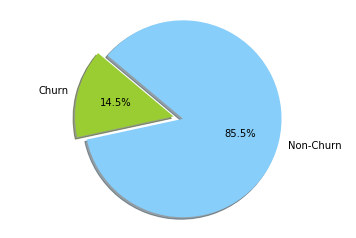

In [7]:
labels = ['Churn', 'Non-Churn']
sizes = [14.491449144914492, 85.5085508550855]
colors = ['yellowgreen','lightskyblue']
explode = (0.1, 0,)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

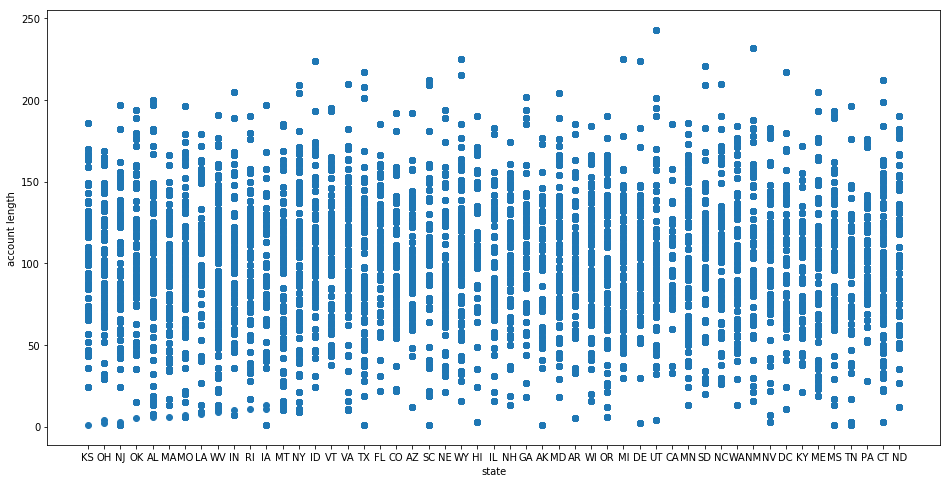

In [8]:

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(TelecomData['state'], TelecomData['account length'])
ax.set_xlabel('state')
ax.set_ylabel('account length')
plt.show()

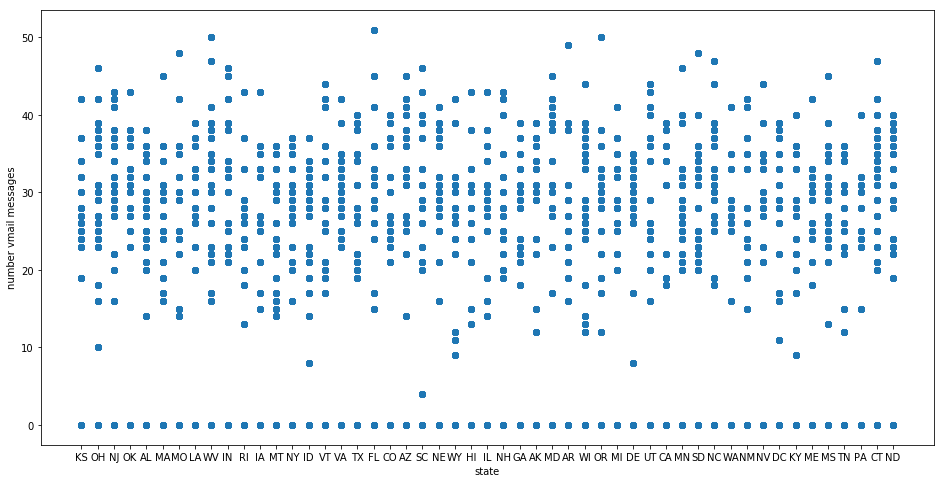

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(TelecomData['state'], TelecomData['number vmail messages'])
ax.set_xlabel('state')
ax.set_ylabel('number vmail messages')
plt.show()

In [10]:

import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > 3:
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(TelecomData['total day minutes'])
print(outlier_datapoints)

[350.8, 346.8, 12.5, 0.0, 0.0, 7.9, 345.3, 2.6, 7.8, 350.8, 346.8, 12.5, 0.0, 0.0, 7.9, 345.3, 2.6, 7.8, 350.8, 346.8, 12.5, 0.0, 0.0, 7.9, 345.3, 2.6, 7.8, 350.8, 346.8, 12.5, 0.0, 0.0, 7.9, 345.3, 2.6, 7.8, 350.8, 346.8, 12.5, 0.0, 0.0, 7.9, 345.3, 2.6, 7.8, 350.8, 346.8, 12.5, 0.0, 0.0, 7.9, 345.3, 2.6, 7.8, 350.8, 346.8, 12.5, 0.0, 0.0, 7.9, 345.3, 2.6, 7.8]


In [11]:
TelecomData.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103.0,NaN,254.4,103.0,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,NaN,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71.0,50.90,...,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False


In [12]:
#Data Exploration
#Finding Null Values and replace with Mean 
TelecomData = TelecomData.fillna(TelecomData.mean())
TelecomData.head()
#TelecomData.applymap(np.absolute)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110.000000,45.07,...,99.0,16.780000,244.7,91.0,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123.000000,27.47,...,103.0,17.083486,254.4,103.0,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,100.435375,41.38,...,110.0,10.300000,162.6,104.0,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71.000000,50.90,...,88.0,5.260000,196.9,89.0,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113.000000,28.34,...,122.0,12.610000,186.9,121.0,8.41,10.1,3,2.73,3,False


In [13]:
#Replace Yes/No with boolean 1/0on Column Churn
TelecomData = TelecomData.applymap(lambda x: 1 if x == 'yes' else x)
TelecomData = TelecomData.applymap(lambda x: 0 if x == 'no' else x)
TelecomData.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110.000000,45.07,...,99.0,16.780000,244.7,91.0,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123.000000,27.47,...,103.0,17.083486,254.4,103.0,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,100.435375,41.38,...,110.0,10.300000,162.6,104.0,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71.000000,50.90,...,88.0,5.260000,196.9,89.0,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113.000000,28.34,...,122.0,12.610000,186.9,121.0,8.41,10.1,3,2.73,3,False


In [14]:
#Replace True/False with boolean 1/0on Column Churn
TelecomData = TelecomData.applymap(lambda x: 1 if x == True else x)
TelecomData = TelecomData.applymap(lambda x: 0 if x == False else x)
TelecomData.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110.000000,45.07,...,99.0,16.780000,244.7,91.0,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123.000000,27.47,...,103.0,17.083486,254.4,103.0,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,100.435375,41.38,...,110.0,10.300000,162.6,104.0,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71.000000,50.90,...,88.0,5.260000,196.9,89.0,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113.000000,28.34,...,122.0,12.610000,186.9,121.0,8.41,10.1,3,2.73,3,0


In [15]:
TelecomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23331 entries, 0 to 23330
Data columns (total 21 columns):
state                     23331 non-null object
account length            23331 non-null int64
area code                 23331 non-null int64
phone number              23331 non-null object
international plan        23331 non-null int64
voice mail plan           23331 non-null int64
number vmail messages     23331 non-null int64
total day minutes         23331 non-null float64
total day calls           23331 non-null float64
total day charge          23331 non-null float64
total eve minutes         23331 non-null float64
total eve calls           23331 non-null float64
total eve charge          23331 non-null float64
total night minutes       23331 non-null float64
total night calls         23331 non-null float64
total night charge        23331 non-null float64
total intl minutes        23331 non-null float64
total intl calls          23331 non-null int64
total intl charge      

In [16]:
#import seaborn as sns
#sns.countplot("Class",data=TelecomData)

In [17]:
#Count Of Churn Customer
Churn=TelecomData.groupby('churn').size()
Churn

churn
0    19950
1     3381
dtype: int64

In [18]:
TelecomData['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [19]:
len(TelecomData['state'].unique())

51

In [20]:
states=TelecomData.groupby("state").size()
states.head()

state
AK    364
AL    560
AR    385
AZ    448
CA    238
dtype: int64

In [21]:
#Data Analysis Using Graph
#Using Matplot Library 
import numpy as np # linear algebra
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\swapn\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [22]:
l1=list(TelecomData['state'])
from collections import Counter
l2=Counter(l1)
key = l2.keys()
df = pd.DataFrame(l2,index=key)
df.drop(df.columns[1:], inplace=True)

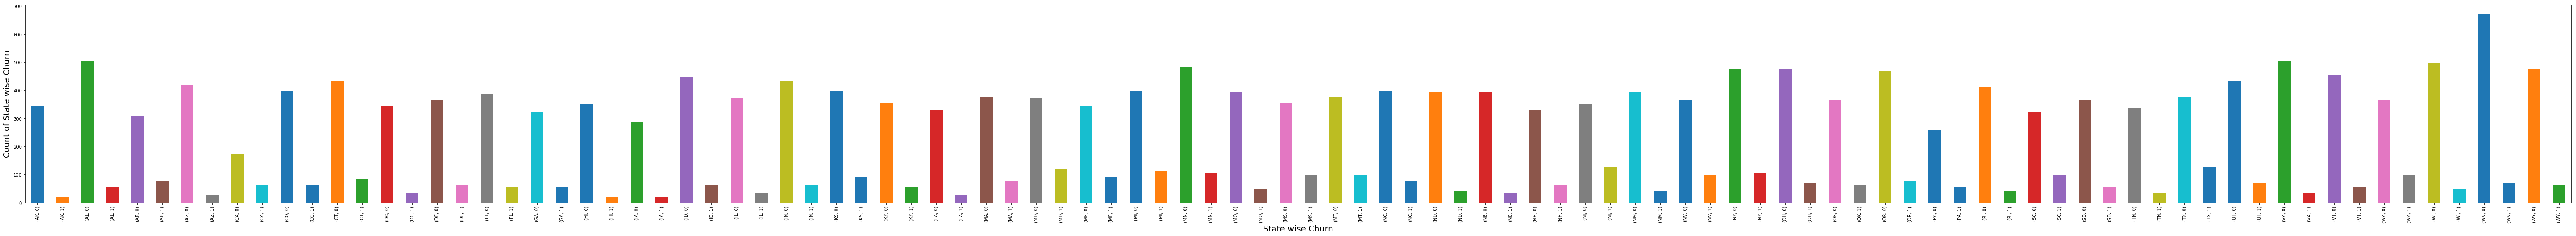

In [23]:
#State Wise Churn Count
State_Churn=TelecomData.groupby(['state', 'churn']).size()
State_Churn.plot( kind= 'bar', figsize=(100,8))
plt.xlabel('State wise Churn', fontsize=18)
plt.ylabel('Count of State wise Churn', fontsize=18)
plt.show()

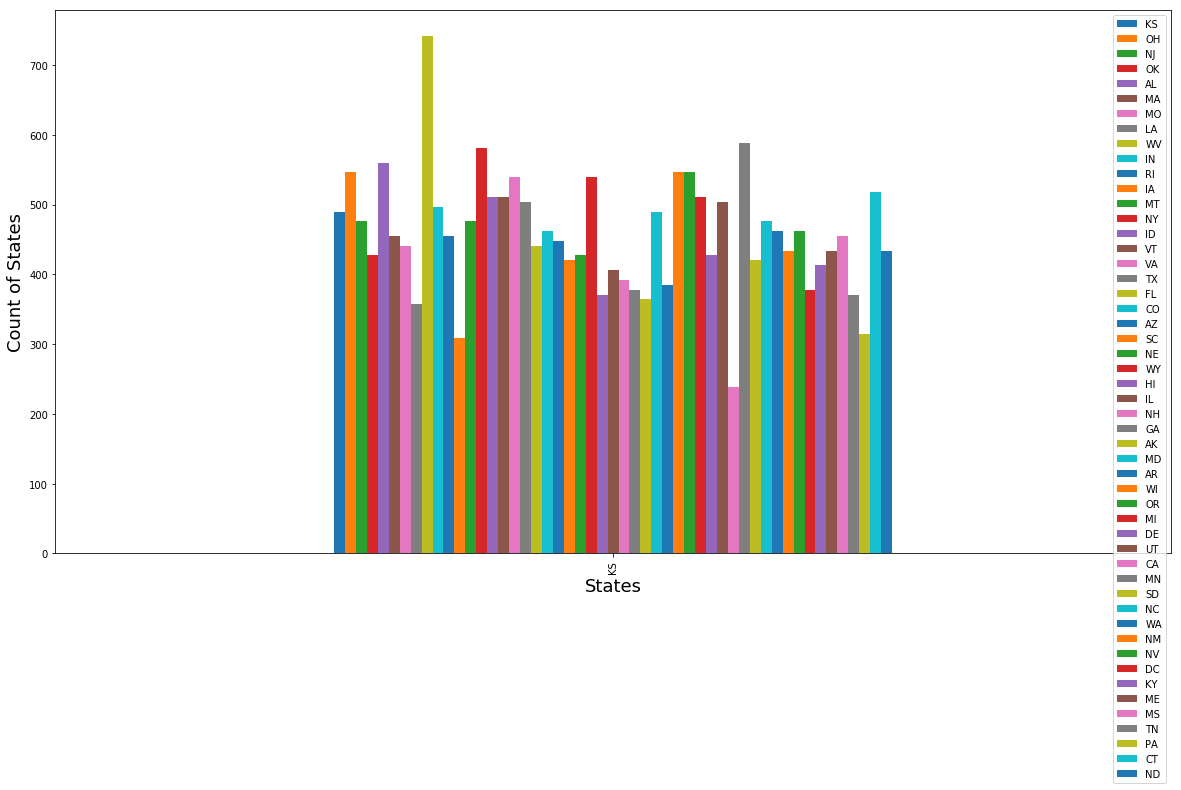

In [24]:
df.plot(kind='bar', figsize=(20,10))
plt.xlabel('States', fontsize=18)
plt.ylabel('Count of States', fontsize=18)
plt.show()

In [25]:
Intl_Churn=TelecomData.groupby(["international plan", 'churn']).size()
Intl_Churn
#intl_plan =TelecomData.groupby(["international plan",'churn']).size()

international plan  churn
0                   0        18648
                    1         2422
1                   0         1302
                    1          959
dtype: int64

In [26]:
VMail_Plan=TelecomData.groupby(['voice mail plan','churn']).size()
VMail_Plan

voice mail plan  churn
0                0        14056
                 1         2821
1                0         5894
                 1          560
dtype: int64

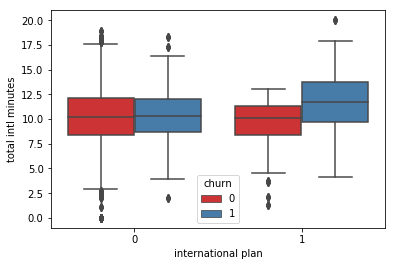

In [27]:
ax = sns.boxplot(x="international plan", y="total intl minutes", hue="churn", data=TelecomData, palette="Set1")

In [28]:
VMail_Plan=TelecomData.groupby(['customer service calls','churn']).size()
VMail_Plan

customer service calls  churn
0                       0        4235
                        1         644
1                       0        7413
                        1         854
2                       0        4704
                        1         609
3                       0        2695
                        1         308
4                       0         630
                        1         532
5                       0         182
                        1         280
6                       0          56
                        1          98
7                       0          28
                        1          35
8                       0           7
                        1           7
9                       1          14
dtype: int64

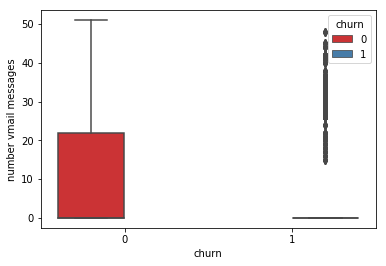

In [29]:
ax = sns.boxplot(x="churn", y="number vmail messages", hue="churn", data=TelecomData, palette="Set1")

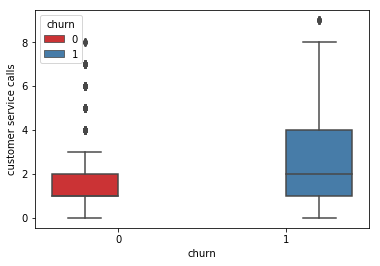

In [30]:
ax = sns.boxplot(x="churn", y="customer service calls", hue="churn", data=TelecomData, palette="Set1")

In [31]:
#International plan Wise Churn Count
Intl_Churn=TelecomData.groupby(["international plan", 'churn']).size()
Intl_Churn

#As seen in this Customer e]who has taken IPlan has more probability to becoe a churn

international plan  churn
0                   0        18648
                    1         2422
1                   0         1302
                    1          959
dtype: int64

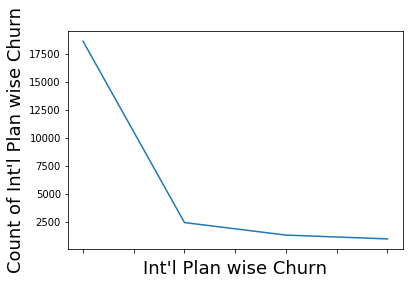

In [32]:
Intl_Churn.plot()
plt.xlabel("Int'l Plan wise Churn", fontsize=18)
plt.ylabel("Count of Int'l Plan wise Churn", fontsize=18)
plt.show()

In [33]:
VmailPlan_Churn=TelecomData.groupby(["voice mail plan", 'churn']).size()
VmailPlan_Churn

voice mail plan  churn
0                0        14056
                 1         2821
1                0         5894
                 1          560
dtype: int64

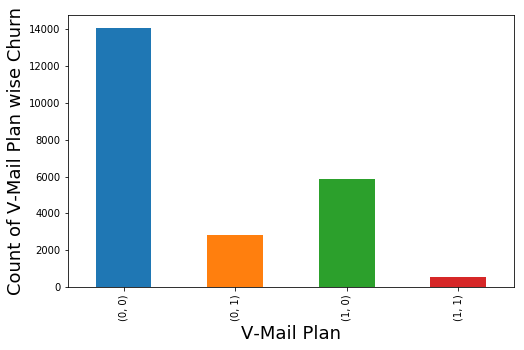

In [34]:

VmailPlan_Churn.plot( kind= 'bar', figsize=(8,5))
plt.xlabel('V-Mail Plan', fontsize=18)
plt.ylabel('Count of V-Mail Plan wise Churn', fontsize=18)
plt.show()

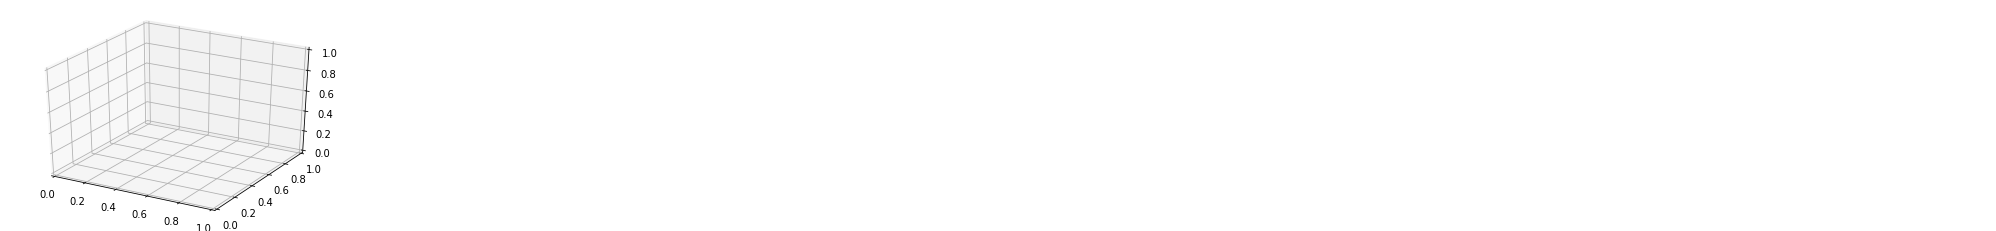

In [35]:
#3D Plot
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

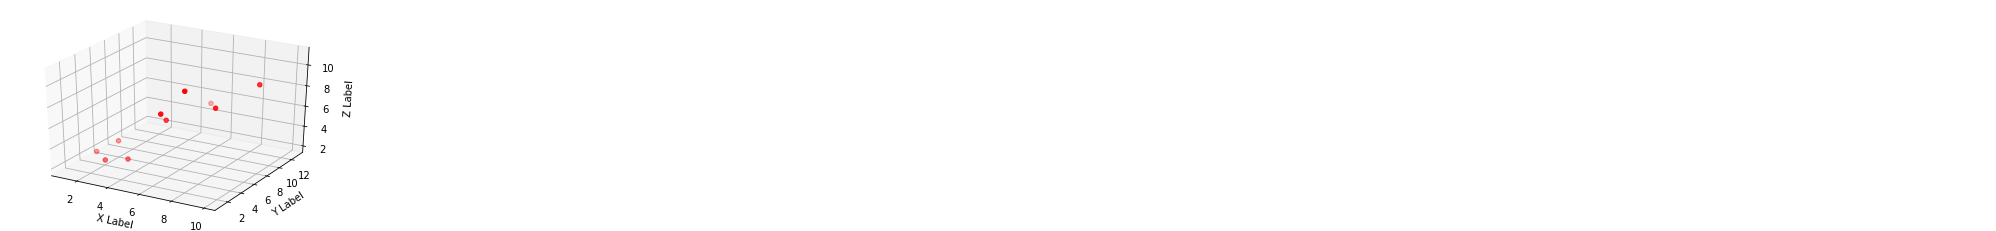

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

#ax.scatter(TelecomData["total day calls"], TelecomData["total day charge"], TelecomData["churn"], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

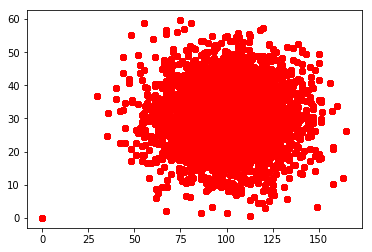

In [59]:
plt.scatter(TelecomData["total day calls"],TelecomData["total day charge"],c='r')
plt.show()

In [61]:
TelecomData=TelecomData.drop("phone number",1)
TelecomData.head()

KeyError: "['phone number'] not found in axis"

In [62]:
TelecomData.tail()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
23326,AZ,192,415,0,1,36,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6,2.67,2,0
23327,WV,68,415,0,0,0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4,2.59,3,0
23328,RI,28,510,0,0,0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6,3.81,2,0
23329,CT,184,510,1,0,0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10,1.35,2,0
23330,TN,74,415,0,1,25,234.4,113.0,39.85,265.9,82.0,22.60,241.4,77.0,10.86,13.7,4,3.70,0,0


In [63]:
X=TelecomData.iloc[:,:-1].values
print(X)

[['KS' 128 415 ... 3 2.7 1]
 ['OH' 107 415 ... 3 3.7 1]
 ['NJ' 137 415 ... 5 3.29 0]
 ...
 ['RI' 28 510 ... 6 3.81 2]
 ['CT' 184 510 ... 10 1.35 2]
 ['TN' 74 415 ... 4 3.7 0]]


In [64]:
Y=TelecomData.iloc[:,19].values
print(Y)

[0 0 0 ... 0 0 0]


In [65]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X[:,0]=labelEncoder_X.fit_transform(X[:,0])
labelEncoder_Y =LabelEncoder()

Y = labelEncoder_X.fit_transform(Y)
print(X)

[[16 128 415 ... 3 2.7 1]
 [35 107 415 ... 3 3.7 1]
 [31 137 415 ... 5 3.29 0]
 ...
 [39 28 510 ... 6 3.81 2]
 [6 184 510 ... 10 1.35 2]
 [42 74 415 ... 4 3.7 0]]


In [66]:
print(X)

[[16 128 415 ... 3 2.7 1]
 [35 107 415 ... 3 3.7 1]
 [31 137 415 ... 5 3.29 0]
 ...
 [39 28 510 ... 6 3.81 2]
 [6 184 510 ... 10 1.35 2]
 [42 74 415 ... 4 3.7 0]]


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state =0)
print(X_train)  
#print(Y_train)
#print(X_test)
#print(Y_test)

[[42 57 510 ... 3 3.21 2]
 [14 16 415 ... 7 1.73 0]
 [10 85 510 ... 2 2.97 3]
 ...
 [44 110 408 ... 4 2.54 1]
 [23 96 415 ... 2 3.05 1]
 [27 130 408 ... 2 4.56 5]]


In [68]:
print(Y_train)

[0 0 0 ... 0 0 1]


In [69]:
print(X_test)

[[33 107 510 ... 3 2.7 1]
 [22 86 415 ... 2 2.43 1]
 [43 66 415 ... 6 2.4 0]
 ...
 [3 62 408 ... 3 2.75 0]
 [29 126 415 ... 4 3.43 3]
 [30 149 415 ... 6 3.29 4]]


In [70]:
print(Y_test)

[0 0 0 ... 0 1 1]


In [71]:
numrows = len(Y_train)   
numrows

18664

In [72]:
#plt.scatter(X_test,X_train)
#plt.show()

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

#random forest

models = []
models.append(('LR', LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [73]:
X_test

array([[33, 107, 510, ..., 3, 2.7, 1],
       [22, 86, 415, ..., 2, 2.43, 1],
       [43, 66, 415, ..., 6, 2.4, 0],
       ...,
       [3, 62, 408, ..., 3, 2.75, 0],
       [29, 126, 415, ..., 4, 3.43, 3],
       [30, 149, 415, ..., 6, 3.29, 4]], dtype=object)

In [74]:
Y_test

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [75]:
numrows = len(X_test)   
numrows
#numcols = len(Y_test[0])

4667

In [76]:
numcols = len(X_test[0])
numcols

19

In [77]:
testData =[[42,156,415,1,1,0,119.2,88,20.26,148.3,45,5.85,204.7,119,9.21,12.2,6,3.29,15]]
testData

[[42,
  156,
  415,
  1,
  1,
  0,
  119.2,
  88,
  20.26,
  148.3,
  45,
  5.85,
  204.7,
  119,
  9.21,
  12.2,
  6,
  3.29,
  15]]

In [82]:
#SVM

from sklearn import svm
model = svm.SVC(gamma='auto')
# Train the model using the training sets and check score
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

#kfold = model_selection.KFold(n_splits=10)
#cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold, scoring = "accuracy")
#cv_result.mean()
#Predict Output
predicted= model.predict(testData)
predicted

array([0], dtype=int64)

In [83]:
#Predict Output
predicted= model.predict(testData)
predicted

array([0], dtype=int64)

In [84]:
#Random Forest
RF = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
RF.fit(X_train,Y_train)
predictions_RF = RF.predict(testData)
predictions_RF

array([0], dtype=int64)

In [85]:
LR = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
LR.fit(X_train,Y_train)
predictions_LR = LR.predict(testData)
predictions_LR

c:\users\swapn\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([1], dtype=int64)

In [86]:
DT =  DecisionTreeClassifier()
DT.fit(X_train,Y_train)
predictions_DT = LR.predict(X_test)
predictions_DT

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [88]:
#Random Forest
RF = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
RF.fit(X_train,Y_train)
predictions_RF = RF.predict(X_test)
predictions_RF



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:

print("Accuracy Score is:")
print(accuracy_score(Y_test, predictions_RF))

Accuracy Score is:
0.8695093207628026


In [90]:
print("Classification Report:")
print(classification_report(Y_test,predictions_RF))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4044
           1       1.00      0.02      0.04       623

   micro avg       0.87      0.87      0.87      4667
   macro avg       0.93      0.51      0.49      4667
weighted avg       0.89      0.87      0.81      4667



In [91]:
conf = confusion_matrix(Y_test,predictions_RF)

In [92]:
conf

array([[4044,    0],
       [ 609,   14]], dtype=int64)

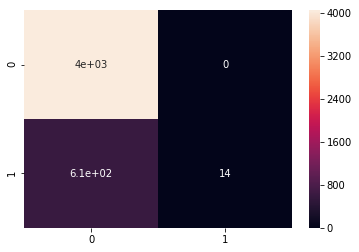

In [93]:
#Random Forest
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [94]:
#SVM

from sklearn import svm
SVM = svm.SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
# Train the model using the training sets and check score
SVM.fit(X_train, Y_train)
SVM.score(X_train, Y_train)

kfold = model_selection.KFold(n_splits=10)
cv_result = model_selection.cross_val_score(SVM,X_train,Y_train, cv = kfold, scoring = "accuracy")
cv_result.mean()
#Predict Output
predicted_SVM= SVM.predict(X_test)
predicted_SVM

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [99]:
Y_test

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [98]:
from sklearn import svm
SVM = svm.SVC(kernel='linear', random_state=0)
# Train the model using the training sets and check score
SVM.fit(X_train, Y_train)
SVM.score(X_train, Y_train)

#kfold = model_selection.KFold(n_splits=10)
#cv_result = model_selection.cross_val_score(SVM,X_train,Y_train, cv = kfold, scoring = "accuracy")
#cv_result.mean()
#Predict Output
predicted_SVM= SVM.predict(X_test)
predicted_SVM

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:

print("Accuracy Score of SVM is:")
print(accuracy_score(Y_test, predicted_SVM))

Accuracy Score of SVM is:
0.8744375401757017


In [101]:
conf = confusion_matrix(Y_test,predicted_SVM)
conf

array([[3960,   84],
       [ 502,  121]], dtype=int64)

In [102]:
print("Classification Report:")
print(classification_report(Y_test,predicted_SVM))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4044
           1       0.59      0.19      0.29       623

   micro avg       0.87      0.87      0.87      4667
   macro avg       0.74      0.59      0.61      4667
weighted avg       0.85      0.87      0.85      4667



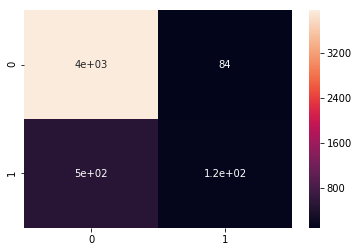

In [103]:
#SVM
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, Y_train)

# plot the samples
plt.scatter(X_train[:, 3], X_train[:, 18], c=Y_train, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

In [ ]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

In [58]:

## Support Vector Machine 
import numpy as np

train_f1 = X_train[:,0]
train_f2 = X_train[:,1]

train_f1 = train_f1.reshape(20,1)
train_f2 = train_f2.reshape(20,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    print(epochs)
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

ValueError: cannot reshape array of size 18664 into shape (90,1)